# Importando as libs e setandos as configurações

In [83]:
## visualização dos dados, metricas e afins
import matplotlib.pyplot as plt
import seaborn as sns

## operações matematicas
import numpy as np

## tensorflow, dados e camadas
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.models import Sequential

## calculo das metricas do modelo
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [84]:
h={
    "VAL_PERC" : 0.2,
    "EMBEDDING_DIM" : 32,
    "LR" : 0.001,
    "BETA1" : 0.9,
    "BETA2" : 0.999,
    "EPSILON" : 1.0e-8,
    "DECAY" : 0.0,
    "NUM_EPOCHS" : 30,
    "BATCH_SIZE" : 32
    }

# Carregando a base de dados e visualizando os dados

In [85]:
## IMPORTANDO A BASE DE DADOS PARA SUAS VARIÁVEIS

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [86]:
print(X_train.shape, '\n',
      y_train.shape, '\n',
      X_test.shape, '\n',
      y_test.shape)


(50000, 32, 32, 3) 
 (50000, 1) 
 (10000, 32, 32, 3) 
 (10000, 1)


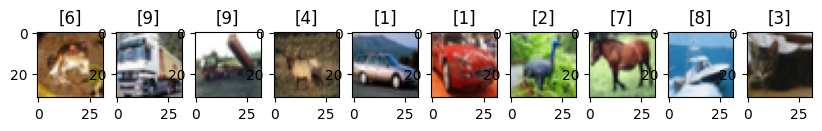

In [87]:
fig, axs = plt.subplots(1,10, figsize=(10,4))
for i in range(10):
    axs[i].imshow(X_train[i])
    axs[i].title.set_text(f'{y_train[i]}')                 # VISUALIZAÇÃO DOS DADOS DO CONJUNTO DE TREINAMENTO

In [88]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [89]:
# normalizando os dados
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [90]:
X_train.shape

(50000, 32, 32, 3)

In [91]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [92]:
classes = np.unique(y_train, return_counts=True)
print(classes[0],'\n', classes[1])

num_classes = len(classes[0])
print(num_classes)

[0 1 2 3 4 5 6 7 8 9] 
 [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
10


In [93]:
# separação em treino, validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=h['VAL_PERC'],
                                                  shuffle=True, # embaralhar a cada separação
                                                  stratify=y_train # balancear as classes pra cada
                                                  )

In [94]:
# shapes finais
print(
    X_train.shape, '\n',
    y_train.shape, '\n',
    X_val.shape, '\n',
    y_val.shape, '\n',
    X_test.shape, '\n',
    y_test.shape
)

(40000, 32, 32, 3) 
 (40000,) 
 (10000, 32, 32, 3) 
 (10000,) 
 (10000, 32, 32, 3) 
 (10000,)


temos 40 mil exemplos de treinamento, cada um com 32 de largura, 32 de altura e 3 canais (rgb)

10 mil exemplos pra validação

10 mil exemplos pra teste



## criando o modelo

In [95]:
model = Sequential([
    ## 1ª CAMADA OCULTA
    Conv2D(32, # nº de neuronios
           (3, 3), # tam do kernel (são 3 cores, portanto camadas, logo 3 kernels utilizados)
           activation='relu', # função de ativação
           input_shape=(32, 32, 3)), # shape de cada imagem

    MaxPooling2D((2, 2)), # pegando o valor máximo de cada kernel (2,2)
    Dropout(0.3), # porcentagem dos dados dropados

    ## 2ª CAMADA OCULTA
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    ## 3ª CAMADA SAÍDA
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.summary() # resumo do nosso modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# compilando o modelo
model.compile(
    optimizer=Adam(learning_rate=h['LR'],
                   beta_1=h['BETA1'],
                   beta_2=h['BETA2'],
                   epsilon=h['EPSILON'],
                   decay=h['DECAY']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [98]:
history = model.fit(
    X_train, y_train,
    batch_size=h['BATCH_SIZE'],
    epochs=h['NUM_EPOCHS'],
    validation_data=(X_val, y_val),
    verbose=2,
    shuffle=True,
)

Epoch 1/30
1250/1250 - 11s - 9ms/step - accuracy: 0.4043 - loss: 1.6360 - val_accuracy: 0.5021 - val_loss: 1.3795
Epoch 2/30
1250/1250 - 3s - 3ms/step - accuracy: 0.5287 - loss: 1.3217 - val_accuracy: 0.6075 - val_loss: 1.1385
Epoch 3/30
1250/1250 - 4s - 3ms/step - accuracy: 0.5761 - loss: 1.2034 - val_accuracy: 0.6165 - val_loss: 1.0891
Epoch 4/30
1250/1250 - 3s - 2ms/step - accuracy: 0.6063 - loss: 1.1205 - val_accuracy: 0.6521 - val_loss: 1.0070
Epoch 5/30
1250/1250 - 3s - 3ms/step - accuracy: 0.6215 - loss: 1.0739 - val_accuracy: 0.6690 - val_loss: 0.9747
Epoch 6/30
1250/1250 - 3s - 2ms/step - accuracy: 0.6388 - loss: 1.0267 - val_accuracy: 0.6717 - val_loss: 0.9343
Epoch 7/30
1250/1250 - 5s - 4ms/step - accuracy: 0.6529 - loss: 0.9947 - val_accuracy: 0.6842 - val_loss: 0.9002
Epoch 8/30
1250/1250 - 3s - 3ms/step - accuracy: 0.6633 - loss: 0.9594 - val_accuracy: 0.6861 - val_loss: 0.8885
Epoch 9/30
1250/1250 - 5s - 4ms/step - accuracy: 0.6721 - loss: 0.9373 - val_accuracy: 0.6729 -

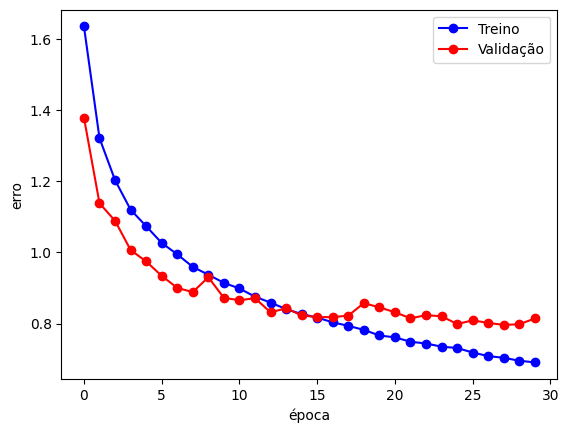

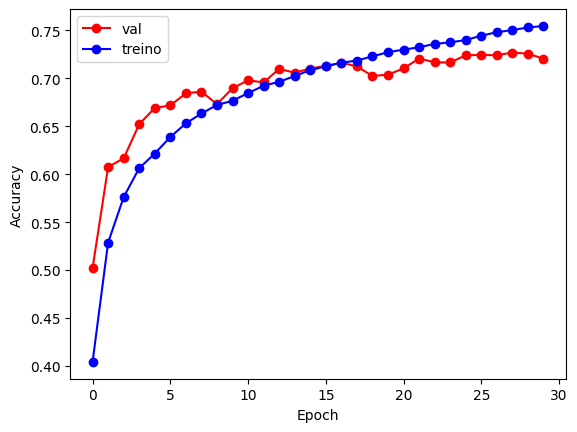

In [99]:
plt.figure()
plt.plot(history.epoch,history.history['loss'], 'o-b', label='Treino')
plt.plot(history.epoch,history.history['val_loss'], 'o-r', label='Validação')

plt.xlabel('época')
plt.ylabel('erro')

plt.legend()                        ########### VISUALIZAÇÃO DOS ERROS E CURVA DE APRENDIZADO DE CADA CONJUNTO (VAL/TREINO)

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label='val')
plt.plot(history.epoch, history.history['accuracy'], 'o-b', label='treino')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


Apesar do modelo está com acurácia não tão boa (cerca de 70 a 75% ao fim das epocas), em ambos os conjuntos (treino e validação), a o erro está a aumentar a partir da epoca 17.

existem algumas alternativas que poderia implementar aqui para poder melhorar isso, como por exemplo: data augmentation ('fabricar' novos dados a partir dos ja existentes, o que seria, no caso de imagem, por exemplo, girar ela, rotacionar, virar, ajustar parametro fotograficos (brilho, saturação...) e por ai vai...)

No entanto, algo observado no inicio foi a qualidade das imagens; Até pra olho humano, as imagens são dificeis de visualizar.

aumentar a epoca não necessariamente pode melhorar esses valores como observado no gráfico acima, mas talvez modificar a quantidade de parametros (capacidade) sim - o que tambem pode comprometer o modelo a overfitting.

vamos testar

In [101]:
model = Sequential([
    ## 1ª CAMADA OCULTA
    Conv2D(32, # nº de neuronios
           (3, 3), # tam do kernel (são 3 cores, portanto camadas, logo 3 kernels utilizados)
           activation='relu', # função de ativação
           input_shape=(32, 32, 3)), # shape de cada imagem

    MaxPooling2D((2, 2)), # pegando o valor máximo de cada kernel (2,2)
    Dropout(0.3), # porcentagem dos dados dropados

    ## 2ª CAMADA OCULTA
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    ## 3ª CAMADA OCULTA
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    ## 4ª CAMADA SAIDA
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 628,810 (2.40 MB)

 Trainable params: 628,810 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

saimos de 300 mil parametros ~
para 600 mil

In [102]:
# compilando o modelo
model.compile(
    optimizer=Adam(learning_rate=h['LR'],
                   beta_1=h['BETA1'],
                   beta_2=h['BETA2'],
                   epsilon=h['EPSILON'],
                   decay=h['DECAY']),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [103]:
history = model.fit(
    X_train, y_train,
    batch_size=h['BATCH_SIZE'],
    epochs=h['NUM_EPOCHS'],
    validation_data=(X_val, y_val),
    verbose=2,
    shuffle=True,
)

Epoch 1/30
1250/1250 - 9s - 8ms/step - accuracy: 0.3928 - loss: 1.6368 - val_accuracy: 0.5121 - val_loss: 1.3474
Epoch 2/30
1250/1250 - 5s - 4ms/step - accuracy: 0.5283 - loss: 1.3137 - val_accuracy: 0.5854 - val_loss: 1.1777
Epoch 3/30
1250/1250 - 3s - 3ms/step - accuracy: 0.5748 - loss: 1.1982 - val_accuracy: 0.5927 - val_loss: 1.1496
Epoch 4/30
1250/1250 - 5s - 4ms/step - accuracy: 0.5966 - loss: 1.1274 - val_accuracy: 0.6305 - val_loss: 1.0464
Epoch 5/30
1250/1250 - 4s - 3ms/step - accuracy: 0.6172 - loss: 1.0800 - val_accuracy: 0.6614 - val_loss: 0.9619
Epoch 6/30
1250/1250 - 3s - 3ms/step - accuracy: 0.6306 - loss: 1.0411 - val_accuracy: 0.6700 - val_loss: 0.9370
Epoch 7/30
1250/1250 - 3s - 3ms/step - accuracy: 0.6469 - loss: 1.0038 - val_accuracy: 0.6843 - val_loss: 0.9183
Epoch 8/30
1250/1250 - 6s - 5ms/step - accuracy: 0.6539 - loss: 0.9799 - val_accuracy: 0.6708 - val_loss: 0.9367
Epoch 9/30
1250/1250 - 4s - 4ms/step - accuracy: 0.6626 - loss: 0.9534 - val_accuracy: 0.7033 - 

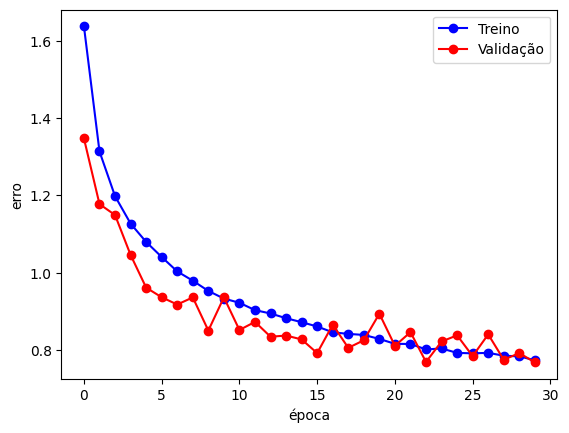

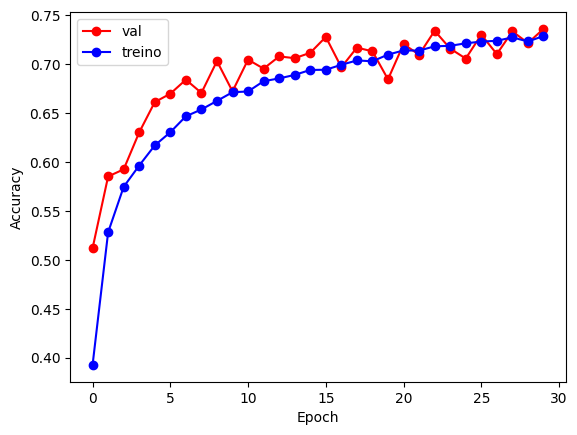

In [104]:
plt.figure()
plt.plot(history.epoch,history.history['loss'], 'o-b', label='Treino')
plt.plot(history.epoch,history.history['val_loss'], 'o-r', label='Validação')

plt.xlabel('época')
plt.ylabel('erro')

plt.legend()                        ########### VISUALIZAÇÃO DOS ERROS E CURVA DE APRENDIZADO DE CADA CONJUNTO (VAL/TREINO)

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label='val')
plt.plot(history.epoch, history.history['accuracy'], 'o-b', label='treino')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


melhorou pra ambos os conjuntos. vamos ver no conj de teste

In [105]:
# avaliando esse ultimo modelo no conjunto de teste
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7765920162200928
Test accuracy: 0.7312999963760376


os valores estão proximos dos erros em cima do conj de treinamento

In [106]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3, 8, 8, ..., 5, 0, 7])

In [107]:
cm = confusion_matrix(y_test, y_pred)

In [110]:
class_labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

<Axes: >

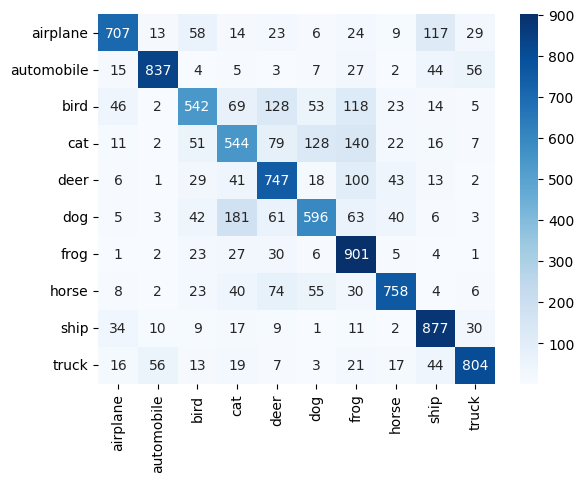

In [113]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f',xticklabels=class_labels, yticklabels=class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Original label is cat and predicted label is cat


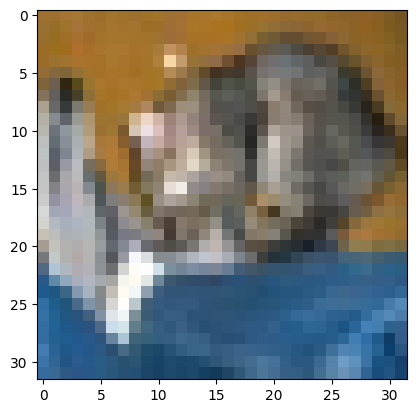

In [120]:
image_number = 0

plt.imshow(X_test[image_number])

n = np.array(X_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = class_labels[model.predict(p).argmax()]

original_label = class_labels[y_test[image_number]]

print(f"Original label is {original_label} and predicted label is {predicted_label}")


In [121]:
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_labels = [(y_test[i], y_pred[i]) for i in misclassified_indices]


In [125]:
misclassified_indices

array([  15,   24,   25, ..., 9989, 9995, 9998])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Original label is ship and predicted label is cat


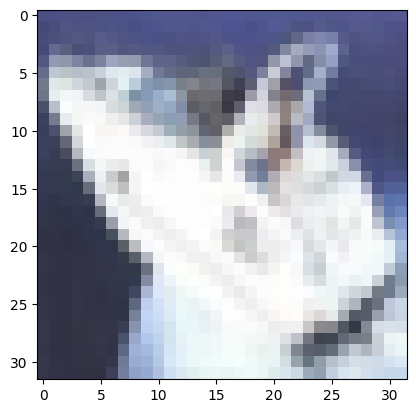

In [126]:
image_number = 9995

plt.imshow(X_test[image_number])

n = np.array(X_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = class_labels[model.predict(p).argmax()]

original_label = class_labels[y_test[image_number]]

print(f"Original label is {original_label} and predicted label is {predicted_label}")
